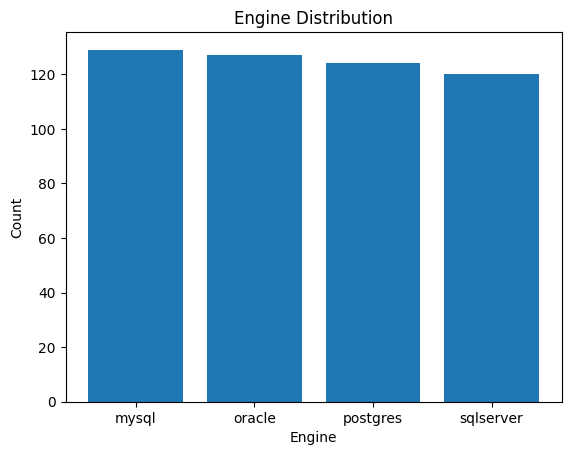

In [32]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming your data is in a DataFrame named df
df = pd.read_csv('data/rds_databases_data.csv')
engine_counts = df['Engine'].value_counts()

plt.bar(engine_counts.index, engine_counts.values)
plt.xlabel('Engine')
plt.ylabel('Count')
plt.title('Engine Distribution')
plt.show()


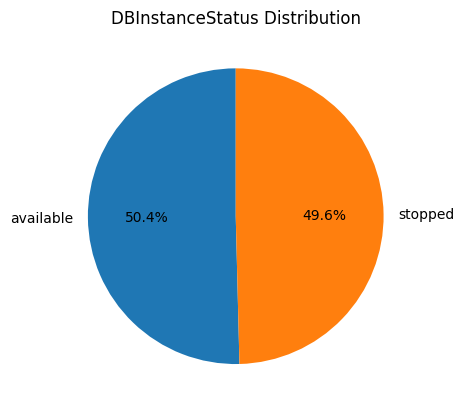

In [33]:
status_counts = df['DBInstanceStatus'].value_counts()

plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('DBInstanceStatus Distribution')
plt.show()


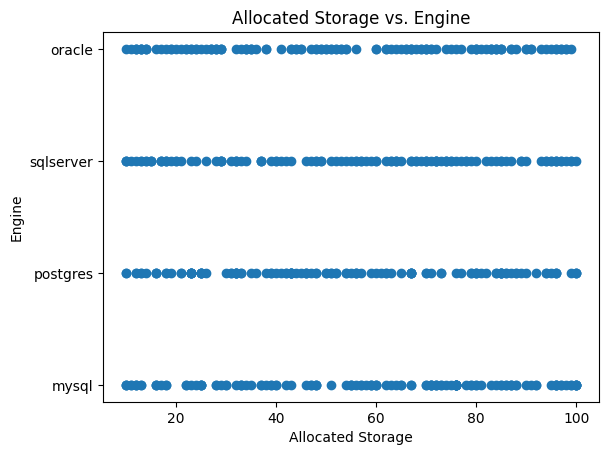

In [34]:
plt.scatter(df['AllocatedStorage'], df['Engine'])
plt.xlabel('Allocated Storage')
plt.ylabel('Engine')
plt.title('Allocated Storage vs. Engine')
plt.show()


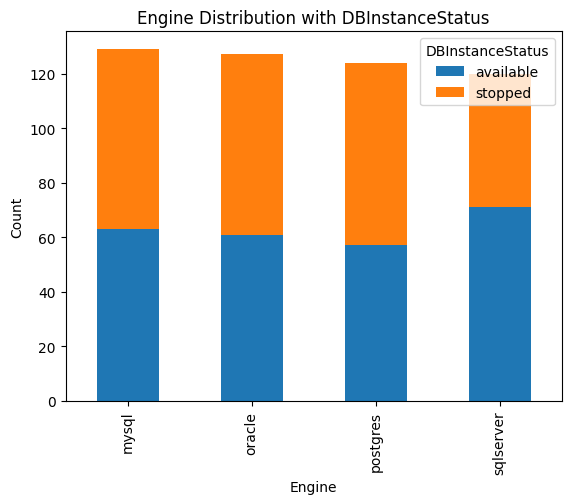

In [35]:
engine_status_counts = df.groupby(['Engine', 'DBInstanceStatus']).size().unstack()

engine_status_counts.plot(kind='bar', stacked=True)
plt.xlabel('Engine')
plt.ylabel('Count')
plt.title('Engine Distribution with DBInstanceStatus')
plt.show()


In [36]:

def recommend_engine_instance_and_storage(storage_requirement):

    filtered_data = df[df['AllocatedStorage'] >= storage_requirement]

    if filtered_data.empty:
        closest_match = df.iloc[(df['AllocatedStorage'] - storage_requirement).abs().argsort()[:1]]
        recommended_engine = closest_match['Engine'].values[0]
        recommended_instance_type = closest_match['DBInstanceClass'].values[0]
        recommended_storage = closest_match['AllocatedStorage'].values[0]
        return recommended_engine, recommended_instance_type, recommended_storage

    recommended_engine = filtered_data['Engine'].values[0]
    recommended_instance_type = filtered_data['DBInstanceClass'].values[0]
    recommended_storage = filtered_data['AllocatedStorage'].values[0]
    return recommended_engine, recommended_instance_type, recommended_storage

user_storage_requirement = 50 

recommendation = recommend_engine_instance_and_storage(user_storage_requirement)
print(f"Recommended Engine: {recommendation[0]}, Recommended Instance Type: {recommendation[1]}, Recommended Storage: {recommendation[2]} GB")


Recommended Engine: postgres, Recommended Instance Type: db.t3.medium, Recommended Storage: 76 GB


In [39]:
df

,DBInstanceIdentifier,DBInstanceStatus,Engine,EngineVersion,DBInstanceClass,AllocatedStorage
0,mydbinstance0,available,mysql,5.7.22,db.m5.2xlarge,10
1,mydbinstance1,stopped,postgres,5.7.22,db.t3.medium,76
2,mydbinstance2,available,sqlserver,5.7.22,db.t3.small,56
3,mydbinstance3,stopped,sqlserver,5.7.22,db.m5.large,31
4,mydbinstance4,stopped,mysql,5.7.22,db.m5.2xlarge,37
...,...,...,...,...,...,...
495,mydbinstance495,stopped,postgres,5.7.22,db.t3.small,33
496,mydbinstance496,available,mysql,5.7.22,db.t2.micro,85
497,mydbinstance497,available,mysql,5.7.22,db.m5.large,59
498,mydbinstance498,stopped,oracle,5.7.22,db.t2.micro,29


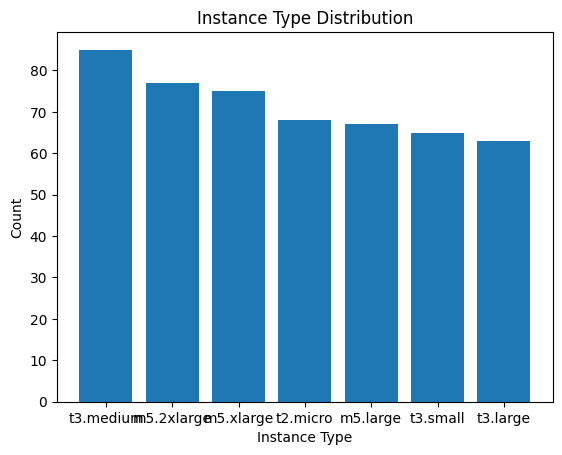

In [ ]:
import matplotlib.pyplot as plt


df = pd.read_csv('data/ec2_instances_data.csv')
instance_type_counts = df['InstanceType'].value_counts()
plt.bar(instance_type_counts.index, instance_type_counts.values)
plt.xlabel('Instance Type')
plt.ylabel('Count')
plt.title('Instance Type Distribution')
plt.show()


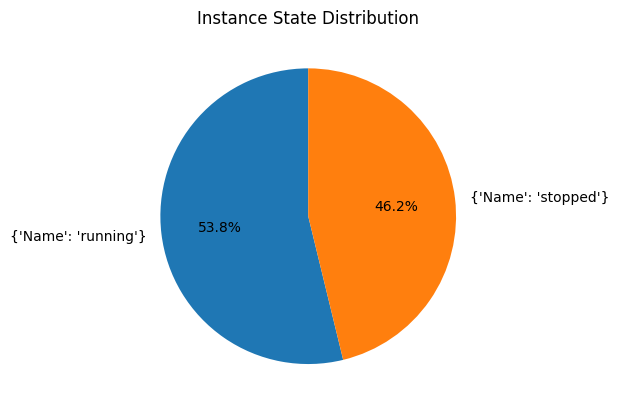

In [ ]:
# Plot a pie chart for Instance State Distribution
state_counts = df['State'].value_counts()
plt.pie(state_counts, labels=state_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Instance State Distribution')
plt.show()


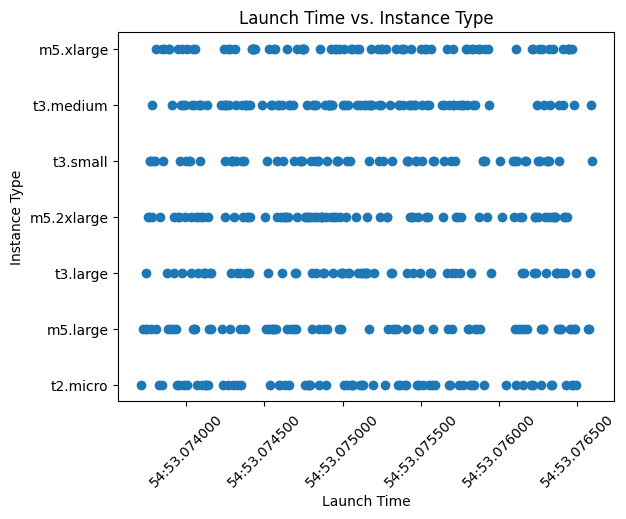

In [ ]:
# Convert 'LaunchTime' to datetime format
df['LaunchTime'] = pd.to_datetime(df['LaunchTime'])

# Plot a scatter plot for Launch Time vs. Instance Type
plt.scatter(df['LaunchTime'], df['InstanceType'])
plt.xlabel('Launch Time')
plt.ylabel('Instance Type')
plt.title('Launch Time vs. Instance Type')
plt.xticks(rotation=45)
plt.show()


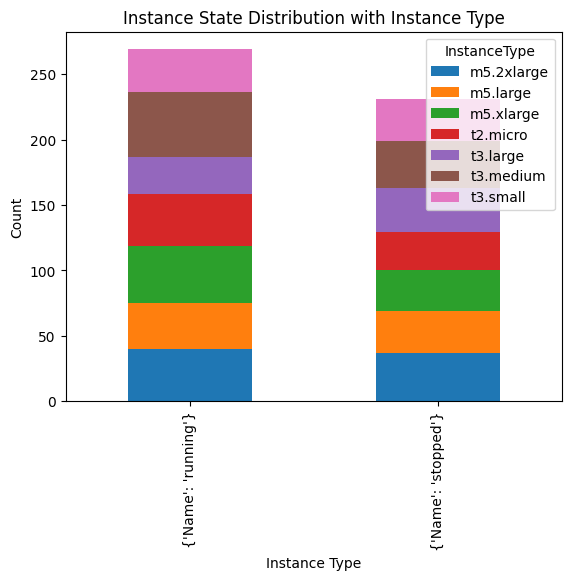

In [ ]:
# Create a stacked bar chart for Instance State Distribution with Instance Type
state_instance_type_counts = df.groupby(['State', 'InstanceType']).size().unstack()
state_instance_type_counts.plot(kind='bar', stacked=True)
plt.xlabel('Instance Type')
plt.ylabel('Count')
plt.title('Instance State Distribution with Instance Type')
plt.show()


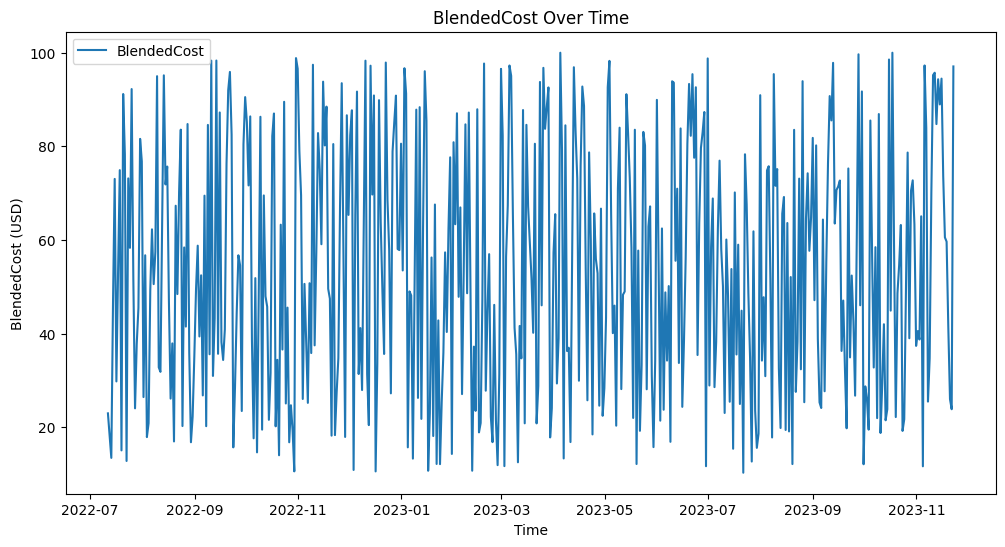

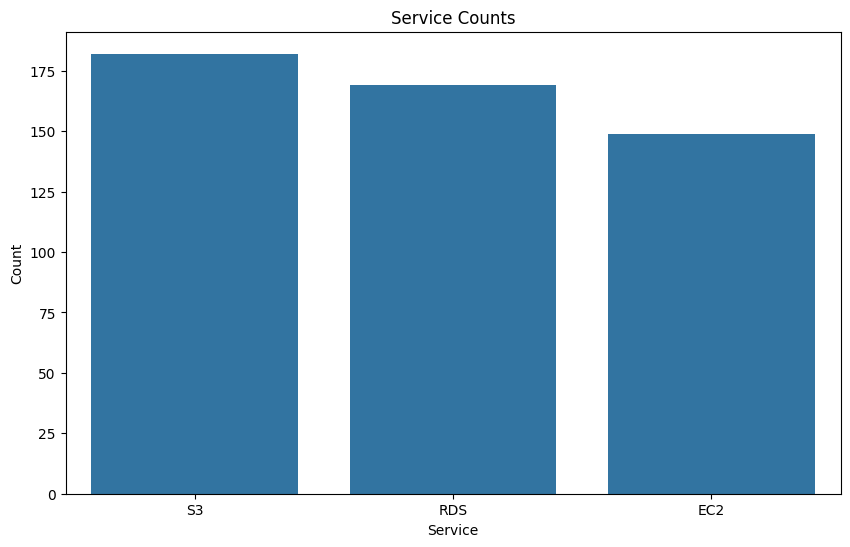

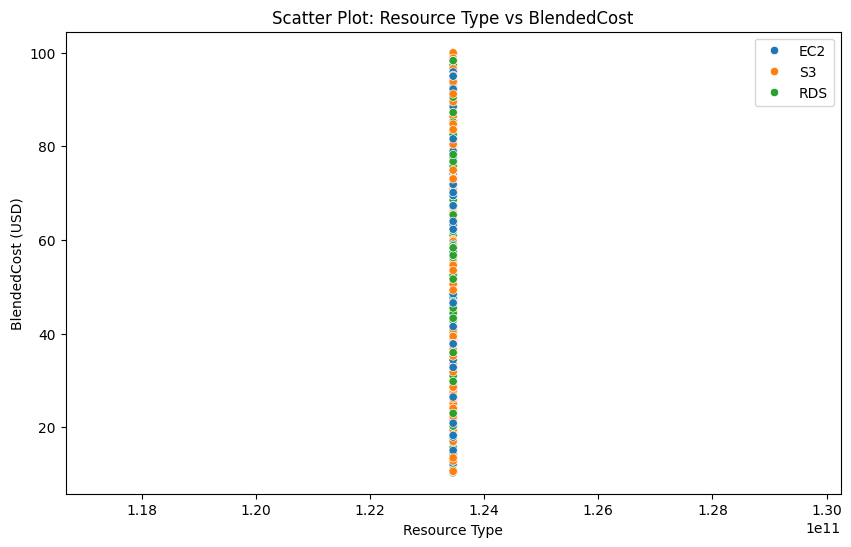

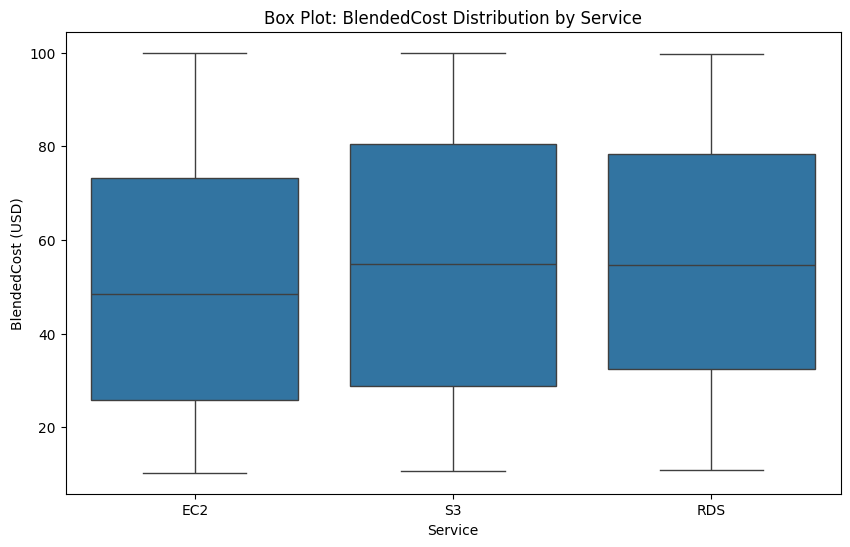

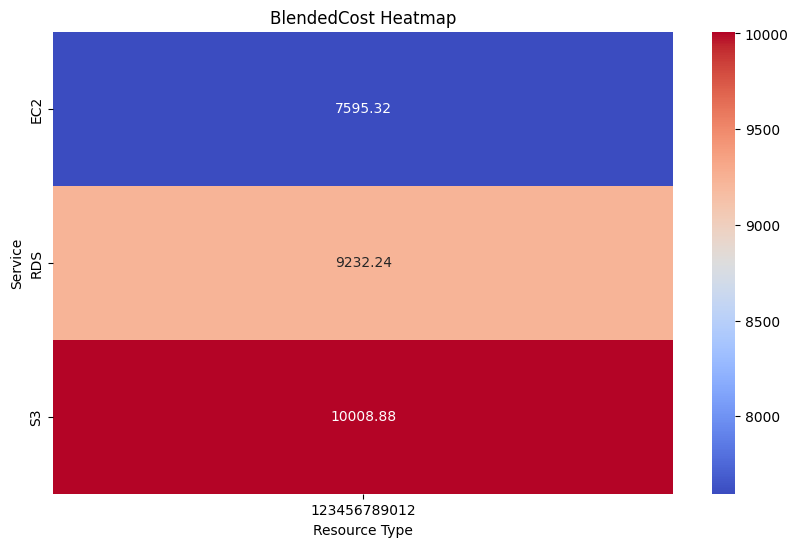

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast  # Import the ast module for literal_eval

# Convert data to DataFrame
df = pd.read_csv('data/cost_explorer_data.csv')

# Convert 'TimePeriod' column to datetime objects
df['TimePeriod'] = df['TimePeriod'].apply(ast.literal_eval)  # Convert string to dictionary
df['Start'] = pd.to_datetime(df['TimePeriod'].apply(lambda x: x['Start']))
df['End'] = pd.to_datetime(df['TimePeriod'].apply(lambda x: x['End']))

# Extract 'Amount' value from 'BlendedCost' dictionary
df['BlendedCost'] = df['BlendedCost'].apply(lambda x: ast.literal_eval(x)['Amount'])

# Plotting

# 1. Line plot for 'BlendedCost' over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='Start', y='BlendedCost', data=df, label='BlendedCost')
plt.title('BlendedCost Over Time')
plt.xlabel('Time')
plt.ylabel('BlendedCost (USD)')
plt.legend()
plt.show()

# 2. Bar plot for 'Service' counts
plt.figure(figsize=(10, 6))
sns.countplot(x='Service', data=df, order=df['Service'].value_counts().index)
plt.title('Service Counts')
plt.xlabel('Service')
plt.ylabel('Count')
plt.show()

# 3. Scatter plot for 'BlendedCost' vs 'Resource Type'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Resource Type', y='BlendedCost', data=df, hue='Service')
plt.title('Scatter Plot: Resource Type vs BlendedCost')
plt.xlabel('Resource Type')
plt.ylabel('BlendedCost (USD)')
plt.legend()
plt.show()

# 4. Box plot for 'BlendedCost' distribution by 'Service'
plt.figure(figsize=(10, 6))
sns.boxplot(x='Service', y='BlendedCost', data=df)
plt.title('Box Plot: BlendedCost Distribution by Service')
plt.xlabel('Service')
plt.ylabel('BlendedCost (USD)')
plt.show()

# 5. Heatmap for correlation between numeric columns
heatmap_data = df.pivot_table(index='Service', columns='Resource Type', values='BlendedCost', aggfunc='sum')
numeric_cols = ['BlendedCost', 'Resource Type']
correlation_matrix = df[numeric_cols].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('BlendedCost Heatmap')
plt.show()


In [68]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import ast

# Load data from CSV file
df = pd.read_csv('data/cost_explorer_data.csv')

# Convert 'TimePeriod' column to datetime objects
df['TimePeriod'] = df['TimePeriod'].apply(ast.literal_eval)  # Convert string to dictionary
df['Start'] = pd.to_datetime(df['TimePeriod'].apply(lambda x: x['Start']))
df['End'] = pd.to_datetime(df['TimePeriod'].apply(lambda x: x['End']))

# Extract 'Amount' value from 'BlendedCost' dictionary
df['BlendedCost'] = df['BlendedCost'].apply(lambda x: ast.literal_eval(x)['Amount'])

# Define features and target variable
features = ['Service', 'Resource Type', 'Start', 'End']
target = 'BlendedCost'

# Create transformers for numerical and categorical columns
numerical_features = ['Start', 'End']
categorical_features = ['Service', 'Resource Type']

# Create a preprocessor with transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Create a pipeline with the preprocessor and the linear regression model
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)

# Train the linear regression model
pipeline.fit(X_train, y_train)

# Make predictions on user input
user_input = {
    'Service': 'EC2',
    'Resource Type': 'EBS:VolumeUsage.gp2',
    'Start': pd.to_datetime('2023-11-23T12:00:00'),  # Replace with user input
    'End': pd.to_datetime('2023-12-23T13:00:00')  # Replace with user input
}

user_input_df = pd.DataFrame([user_input])
user_input_features = user_input_df[features]

# Make predictions
user_predictions = pipeline.predict(user_input_features)

print(f'Predicted BlendedCost: {round(user_predictions[0]/1000000000)} USD')


Predicted BlendedCost: 72 USD
